<a href="https://colab.research.google.com/github/Mariammmmmmm/modeling_labs/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%961_%D0%BF%D0%BE_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рстакян Мариам 

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 38 kB/s 
     |████████████████████████████████| 199 kB 38.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=874ec12be81d50d55505d2c871bc35cc7195b04c6b371c401b9ccdb245a15f24
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Dataframe').getOrCreate()
spark

In [3]:
part0 = spark.read.parquet('part.parquet')
part0 = part0.dropna()
part1 = spark.read.parquet('part_1.parquet')
part1 = part1.dropna()
part2 = spark.read.parquet('part_2.parquet')
part2 = part2.dropna()
part3 = spark.read.parquet('part_3.parquet')
part3 = part3.dropna()
part4 = spark.read.parquet('part_4.parquet')
part4 = part4.dropna()
part0 = part0.union(part1).union(part2).union(part3).union(part4)
part0 = part0.dropna()
part0.show(5)

+------+-------------------+--------+--------------+---------+--------------+--------------------+--------------+--------------+-----------+---+-------+----+------------+-----------+----+-----------+----------+---------+------------------+-----------------+
|app_id|               amnt|currency|operation_kind|card_type|operation_type|operation_type_group|ecommerce_flag|payment_system|income_flag|mcc|country|city|mcc_category|day_of_week|hour|days_before|weekofyear|hour_diff|transaction_number|__index_level_0__|
+------+-------------------+--------+--------------+---------+--------------+--------------------+--------------+--------------+-----------+---+-------+----+------------+-----------+----+-----------+----------+---------+------------------+-----------------+
|     0| 0.4654254330729043|       1|             4|       98|             4|                   2|             3|             7|          3|  2|      1|  37|           2|          4|  19|        351|        34|       -1|      

In [4]:
part0.count()

23151945

In [5]:
part0 = part0.filter("amnt != 0")
part0.count()

23029052

In [6]:
years_data_df = part0.groupBy("days_before","app_id").count()
years_data_df.show(5)

+-----------+------+-----+
|days_before|app_id|count|
+-----------+------+-----+
|          1|     1|    1|
|          1|     4|    2|
|          1|    25|    2|
|          1|    32|    2|
|          1|    37|    2|
+-----------+------+-----+
only showing top 5 rows



In [7]:
pivot_years_df = years_data_df.groupBy('app_id').pivot('days_before').sum("count") 
pivot_years_df.show(5)

+------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---

In [8]:
pivot_years_df.count()

88569

In [9]:
pivot_years_df = pivot_years_df.na.fill(0)
pivot_years_df.show(5)

+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

In [10]:
cols = []
for i in range(359):
  a = str(i+1)
  cols.append(a)

In [11]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
vec_assemb = VectorAssembler(inputCols=cols, outputCol="years_day")
final_data = vec_assemb.transform(pivot_years_df)
#final_data = final_data.select("app_id","years_day")
final_data.show(10)

+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

In [12]:
pivot_years_df.select('app_id').distinct().count()

88569

In [13]:
pivot_years_df.count()

88569

Нормализация данных

In [15]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="years_day", outputCol="scaled_years_day", withStd=True, withMean=False)
scaled_model = scaler.fit(final_data)
cluster_df = scaled_model.transform(final_data)
cluster_df.show(5)

+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

In [16]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
kmeans = KMeans(featuresCol="scaled_years_day", k=3)
model = kmeans.fit(cluster_df)
model.transform(cluster_df).groupBy("prediction").count().show(5)

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 3652|
|         2|20222|
|         0|64695|
+----------+-----+



In [17]:
predictions = model.transform(cluster_df)
predictions.show(5)

+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

In [18]:
predictions.groupBy("app_id", "prediction").count().show(5)

+-------+----------+-----+
| app_id|prediction|count|
+-------+----------+-----+
|  48254|         0|    1|
|  49855|         0|    1|
|  59990|         0|    1|
|1064231|         0|    1|
|  30183|         0|    1|
+-------+----------+-----+
only showing top 5 rows



In [19]:
cols.append('prediction')
pred = predictions.select(cols)
pred.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---

In [20]:
centers = model.clusterCenters()
import numpy as np
cent = np.array(centers).T
cent

array([[0.33567237, 2.20200899, 1.05482211],
       [0.31753689, 2.13494825, 1.00769656],
       [0.29677695, 2.13818151, 0.98735355],
       ...,
       [0.21845479, 2.19444066, 0.88275751],
       [0.20712318, 2.13958173, 0.86190745],
       [0.19746118, 2.09694607, 0.82708373]])

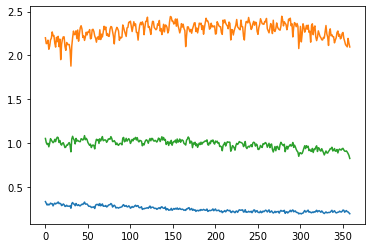

In [21]:
from matplotlib import pyplot as plt
plt.plot(cent)

In [22]:
week_data_df = part0.groupBy("day_of_week","app_id").count()
week_data_df.show(5)

+-----------+------+-----+
|day_of_week|app_id|count|
+-----------+------+-----+
|          3|    22|   91|
|          7|    55|   50|
|          3|    57|   25|
|          6|   117|   18|
|          7|   132|   16|
+-----------+------+-----+
only showing top 5 rows



In [23]:
pivot_week_df = week_data_df.groupBy('app_id').pivot('day_of_week').sum("count") 
pivot_week_df.show(5)

+------+---+---+---+---+---+---+---+
|app_id|  1|  2|  3|  4|  5|  6|  7|
+------+---+---+---+---+---+---+---+
|  5803| 35| 51| 48| 36| 44| 43| 42|
|  7340|  8|  8|  8| 18| 12| 11| 18|
|  9852| 67| 49| 64| 60| 35| 45| 44|
| 15727| 48| 52| 52| 39| 37| 37| 53|
| 18979|  7|  3|  5|  7|  4|  5|  7|
+------+---+---+---+---+---+---+---+
only showing top 5 rows



In [24]:
pivot_week_df = pivot_week_df.na.fill(0)
pivot_week_df.show(5)

+------+---+---+---+---+---+---+---+
|app_id|  1|  2|  3|  4|  5|  6|  7|
+------+---+---+---+---+---+---+---+
|  5803| 35| 51| 48| 36| 44| 43| 42|
|  7340|  8|  8|  8| 18| 12| 11| 18|
|  9852| 67| 49| 64| 60| 35| 45| 44|
| 15727| 48| 52| 52| 39| 37| 37| 53|
| 18979|  7|  3|  5|  7|  4|  5|  7|
+------+---+---+---+---+---+---+---+
only showing top 5 rows



In [25]:
cols = []
for i in range(7):
  a = str(i+1)
  cols.append(a)

In [26]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
vec_assemb = VectorAssembler(inputCols=cols, outputCol="week_day")
final_data = vec_assemb.transform(pivot_week_df)
final_data.show(10)

+------+---+---+---+---+---+---+---+--------------------+
|app_id|  1|  2|  3|  4|  5|  6|  7|            week_day|
+------+---+---+---+---+---+---+---+--------------------+
|  5803| 35| 51| 48| 36| 44| 43| 42|[35.0,51.0,48.0,3...|
|  7340|  8|  8|  8| 18| 12| 11| 18|[8.0,8.0,8.0,18.0...|
|  9852| 67| 49| 64| 60| 35| 45| 44|[67.0,49.0,64.0,6...|
| 15727| 48| 52| 52| 39| 37| 37| 53|[48.0,52.0,52.0,3...|
| 18979|  7|  3|  5|  7|  4|  5|  7|[7.0,3.0,5.0,7.0,...|
| 21220| 57| 37| 50| 52| 34| 41| 21|[57.0,37.0,50.0,5...|
|  3997|  5|  4|  9|  7|  8|  5|  2|[5.0,4.0,9.0,7.0,...|
|  8638| 25| 32| 20| 10| 21| 15| 40|[25.0,32.0,20.0,1...|
| 13285|  4|  1|  0|  0|  6|  0|  0|(7,[0,1,4],[4.0,1...|
| 23336|103| 78| 68| 78| 64| 73| 68|[103.0,78.0,68.0,...|
+------+---+---+---+---+---+---+---+--------------------+
only showing top 10 rows



Нормализация данных

In [27]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="week_day", outputCol="scaled_week_day", withStd=True, withMean=False)
scaled_model = scaler.fit(final_data)
cluster_df = scaled_model.transform(final_data)
cluster_df.show(5)

+------+---+---+---+---+---+---+---+--------------------+--------------------+
|app_id|  1|  2|  3|  4|  5|  6|  7|            week_day|     scaled_week_day|
+------+---+---+---+---+---+---+---+--------------------+--------------------+
|  5803| 35| 51| 48| 36| 44| 43| 42|[35.0,51.0,48.0,3...|[0.74064930047730...|
|  7340|  8|  8|  8| 18| 12| 11| 18|[8.0,8.0,8.0,18.0...|[0.16929126868052...|
|  9852| 67| 49| 64| 60| 35| 45| 44|[67.0,49.0,64.0,6...|[1.41781437519941...|
| 15727| 48| 52| 52| 39| 37| 37| 53|[48.0,52.0,52.0,3...|[1.01574761208316...|
| 18979|  7|  3|  5|  7|  4|  5|  7|[7.0,3.0,5.0,7.0,...|[0.14812986009546...|
+------+---+---+---+---+---+---+---+--------------------+--------------------+
only showing top 5 rows



In [28]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
kmeans = KMeans(featuresCol="scaled_week_day", k=3)
model = kmeans.fit(cluster_df)
model.transform(cluster_df).groupBy("prediction").count().show(5)

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 4509|
|         2|23111|
|         0|60949|
+----------+-----+



In [29]:
predictions = model.transform(cluster_df)
predictions.show(5)

+------+---+---+---+---+---+---+---+--------------------+--------------------+----------+
|app_id|  1|  2|  3|  4|  5|  6|  7|            week_day|     scaled_week_day|prediction|
+------+---+---+---+---+---+---+---+--------------------+--------------------+----------+
|  5803| 35| 51| 48| 36| 44| 43| 42|[35.0,51.0,48.0,3...|[0.74064930047730...|         2|
|  7340|  8|  8|  8| 18| 12| 11| 18|[8.0,8.0,8.0,18.0...|[0.16929126868052...|         0|
|  9852| 67| 49| 64| 60| 35| 45| 44|[67.0,49.0,64.0,6...|[1.41781437519941...|         2|
| 15727| 48| 52| 52| 39| 37| 37| 53|[48.0,52.0,52.0,3...|[1.01574761208316...|         2|
| 18979|  7|  3|  5|  7|  4|  5|  7|[7.0,3.0,5.0,7.0,...|[0.14812986009546...|         0|
+------+---+---+---+---+---+---+---+--------------------+--------------------+----------+
only showing top 5 rows



In [30]:
predictions.groupBy("app_id", "prediction").count().show(5)

+-------+----------+-----+
| app_id|prediction|count|
+-------+----------+-----+
|1064231|         0|    1|
|  49855|         0|    1|
|  59990|         0|    1|
|  30183|         0|    1|
|  11936|         2|    1|
+-------+----------+-----+
only showing top 5 rows



In [31]:
cols.append('prediction')
pred = predictions.select(cols)
pred.show()

+---+---+---+---+---+---+---+----------+
|  1|  2|  3|  4|  5|  6|  7|prediction|
+---+---+---+---+---+---+---+----------+
| 35| 51| 48| 36| 44| 43| 42|         2|
|  8|  8|  8| 18| 12| 11| 18|         0|
| 67| 49| 64| 60| 35| 45| 44|         2|
| 48| 52| 52| 39| 37| 37| 53|         2|
|  7|  3|  5|  7|  4|  5|  7|         0|
| 57| 37| 50| 52| 34| 41| 21|         0|
|  5|  4|  9|  7|  8|  5|  2|         0|
| 25| 32| 20| 10| 21| 15| 40|         0|
|  4|  1|  0|  0|  6|  0|  0|         0|
|103| 78| 68| 78| 64| 73| 68|         2|
| 25|  8| 39| 31| 44| 39|  5|         0|
|  5|  0|  6|  2|  1|  5|  1|         0|
| 12|  8|  7|  7|  6|  8| 14|         0|
| 17|  6|  6| 12| 14| 16| 12|         0|
|104| 58| 82| 96| 92| 73| 59|         2|
| 19|  7| 20| 25| 17| 17| 10|         0|
|  6|  1|  3|  2|  5|  5|  2|         0|
| 24| 25| 24| 16|  9| 11| 12|         0|
|126|116|130|128|137|116|124|         1|
| 74| 45| 55| 61| 33| 45| 18|         2|
+---+---+---+---+---+---+---+----------+
only showing top

In [32]:
centers = model.clusterCenters()
cent = np.array(centers).T

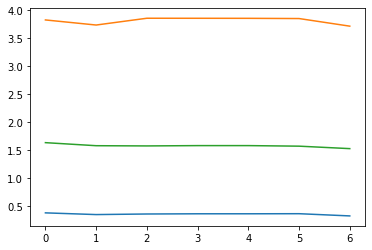

In [33]:
from matplotlib import pyplot as plt
plt.plot(cent)

In [34]:
hour_data_df = part0.groupBy("hour","app_id").count()
hour_data_df.show(5)

+----+------+-----+
|hour|app_id|count|
+----+------+-----+
|  15|    14|   10|
|  15|    26|    6|
|   8|    52|    1|
|   7|    55|    1|
|   6|   117|    2|
+----+------+-----+
only showing top 5 rows



In [35]:
pivot_hour_df = hour_data_df.groupBy('app_id').pivot('hour').sum("count") 
pivot_hour_df.show(5)

+------+----+----+----+----+----+----+----+----+----+----+---+---+---+---+----+---+---+---+---+----+----+----+----+----+
|app_id|   0|   1|   2|   3|   4|   5|   6|   7|   8|   9| 10| 11| 12| 13|  14| 15| 16| 17| 18|  19|  20|  21|  22|  23|
+------+----+----+----+----+----+----+----+----+----+----+---+---+---+---+----+---+---+---+---+----+----+----+----+----+
|  1238|   4|null|   2|null|   3|   9|  29|  15|  14|  25| 25| 31| 22| 26|  16|  6|  5|  8|  4|   1|   1|   2|   1|null|
|  9900|   1|null|null|null|null|null|   1|   2|   6|  11| 13|  9| 16| 11|  12|  8| 17|  2|  3|   2|   2|   1|   1|   1|
|  1645|null|null|null|null|null|null|null|null|   1|null|  1|  3|  2|  2|   2|  2|  4|  3|  4|null|null|null|null|null|
|  2659|   2|   2|null|null|null|null|null|null|   1|   4|  2|  5|  4|  2|   8|  8|  8|  5|  2|  14|   5|   5|   3|   3|
|  3918|   2|null|null|null|null|null|null|null|null|   8|  9|  2|  1|  1|null|  1|  2|  7|  8|   9|   1|   3|null|null|
+------+----+----+----+----+----

In [36]:
pivot_hour_df = pivot_hour_df.na.fill(0)
pivot_hour_df.show(5)

+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|app_id|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|
+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|  1238|  4|  0|  2|  0|  3|  9| 29| 15| 14| 25| 25| 31| 22| 26| 16|  6|  5|  8|  4|  1|  1|  2|  1|  0|
|  9900|  1|  0|  0|  0|  0|  0|  1|  2|  6| 11| 13|  9| 16| 11| 12|  8| 17|  2|  3|  2|  2|  1|  1|  1|
|  1645|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  1|  3|  2|  2|  2|  2|  4|  3|  4|  0|  0|  0|  0|  0|
|  2659|  2|  2|  0|  0|  0|  0|  0|  0|  1|  4|  2|  5|  4|  2|  8|  8|  8|  5|  2| 14|  5|  5|  3|  3|
|  3918|  2|  0|  0|  0|  0|  0|  0|  0|  0|  8|  9|  2|  1|  1|  0|  1|  2|  7|  8|  9|  1|  3|  0|  0|
+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
only showing top 5 rows



In [37]:
cols = []
for i in range(24):
  a = str(i)
  cols.append(a)

In [38]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
vec_assemb = VectorAssembler(inputCols=cols, outputCol="hour_day")
final_data = vec_assemb.transform(pivot_hour_df)
final_data.show(10)

+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+
|app_id|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|            hour_day|
+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+
|  1238|  4|  0|  2|  0|  3|  9| 29| 15| 14| 25| 25| 31| 22| 26| 16|  6|  5|  8|  4|  1|  1|  2|  1|  0|[4.0,0.0,2.0,0.0,...|
|  9900|  1|  0|  0|  0|  0|  0|  1|  2|  6| 11| 13|  9| 16| 11| 12|  8| 17|  2|  3|  2|  2|  1|  1|  1|[1.0,0.0,0.0,0.0,...|
|  1645|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  1|  3|  2|  2|  2|  2|  4|  3|  4|  0|  0|  0|  0|  0|(24,[8,10,11,12,1...|
|  2659|  2|  2|  0|  0|  0|  0|  0|  0|  1|  4|  2|  5|  4|  2|  8|  8|  8|  5|  2| 14|  5|  5|  3|  3|[2.0,2.0,0.0,0.0,...|
|  3918|  2|  0|  0|  0|  0|  0|  0|  0|  0|  8|  9|  2|  1|  1|  0|  1|  2|  7|  8|  9|  1|  3|  0|  0|(24,[0,9,10,11

Нормализация данных

In [39]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="hour_day", outputCol="scaled_hour_day", withStd=True, withMean=False)
scaled_model = scaler.fit(final_data)
cluster_df = scaled_model.transform(final_data)
cluster_df.show(5)

+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+
|app_id|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|            hour_day|     scaled_hour_day|
+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+
|  1238|  4|  0|  2|  0|  3|  9| 29| 15| 14| 25| 25| 31| 22| 26| 16|  6|  5|  8|  4|  1|  1|  2|  1|  0|[4.0,0.0,2.0,0.0,...|[0.46139191942622...|
|  9900|  1|  0|  0|  0|  0|  0|  1|  2|  6| 11| 13|  9| 16| 11| 12|  8| 17|  2|  3|  2|  2|  1|  1|  1|[1.0,0.0,0.0,0.0,...|[0.11534797985655...|
|  1645|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  1|  3|  2|  2|  2|  2|  4|  3|  4|  0|  0|  0|  0|  0|(24,[8,10,11,12,1...|(24,[8,10,11,12,1...|
|  2659|  2|  2|  0|  0|  0|  0|  0|  0|  1|  4|  2|  5|  4|  2|  8|  8|  8|  5|  2| 14|  5|  5|  3|  3|[2.0,2.0,0.0,0

In [40]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
kmeans = KMeans(featuresCol="scaled_hour_day", k=3)
model = kmeans.fit(cluster_df)
model.transform(cluster_df).groupBy("prediction").count().show(5)

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 3617|
|         2|21979|
|         0|62973|
+----------+-----+



In [41]:
predictions = model.transform(cluster_df)
predictions.show(5)

+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+----------+
|app_id|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|            hour_day|     scaled_hour_day|prediction|
+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+--------------------+--------------------+----------+
|  1238|  4|  0|  2|  0|  3|  9| 29| 15| 14| 25| 25| 31| 22| 26| 16|  6|  5|  8|  4|  1|  1|  2|  1|  0|[4.0,0.0,2.0,0.0,...|[0.46139191942622...|         0|
|  9900|  1|  0|  0|  0|  0|  0|  1|  2|  6| 11| 13|  9| 16| 11| 12|  8| 17|  2|  3|  2|  2|  1|  1|  1|[1.0,0.0,0.0,0.0,...|[0.11534797985655...|         0|
|  1645|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  1|  3|  2|  2|  2|  2|  4|  3|  4|  0|  0|  0|  0|  0|(24,[8,10,11,12,1...|(24,[8,10,11,12,1...|         0|
|  2659|  2|  2|  0|  0|  0|  0|  0|  0|  1|  4|  2|

In [42]:
predictions.groupBy("app_id", "prediction").count().show(5)

+-------+----------+-----+
| app_id|prediction|count|
+-------+----------+-----+
|1064231|         0|    1|
|  49855|         0|    1|
|  59990|         0|    1|
|  30183|         0|    1|
|  11936|         2|    1|
+-------+----------+-----+
only showing top 5 rows



In [43]:
cols.append('prediction')
pred = predictions.select(cols)
pred.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----------+
|  0|  1|  2|  3|  4|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23|prediction|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----------+
|  4|  0|  2|  0|  3|  9| 29| 15| 14| 25| 25| 31| 22| 26| 16|  6|  5|  8|  4|  1|  1|  2|  1|  0|         0|
|  1|  0|  0|  0|  0|  0|  1|  2|  6| 11| 13|  9| 16| 11| 12|  8| 17|  2|  3|  2|  2|  1|  1|  1|         0|
|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  1|  3|  2|  2|  2|  2|  4|  3|  4|  0|  0|  0|  0|  0|         0|
|  2|  2|  0|  0|  0|  0|  0|  0|  1|  4|  2|  5|  4|  2|  8|  8|  8|  5|  2| 14|  5|  5|  3|  3|         0|
|  2|  0|  0|  0|  0|  0|  0|  0|  0|  8|  9|  2|  1|  1|  0|  1|  2|  7|  8|  9|  1|  3|  0|  0|         0|
|  1|  0|  0|  0|  2|  0|  2|  2|  7| 12|  9|  9|  6| 11|  5|  6| 25| 26| 26|  7|  4|  2|  0|  1|         0|
|  1|  0|  0|  0|  

In [44]:
centers = model.clusterCenters()
cent = np.array(centers).T

In [45]:
centers[2][23]

0.698373930209865

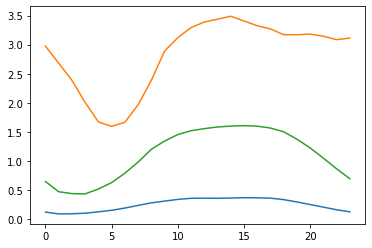

In [46]:
from matplotlib import pyplot as plt
plt.plot(cent)

------------------------------------------------------------------

Профилирование по тратам

In [48]:
spending_df = part0.groupBy("app_id", "amnt").sum('amnt')
spending_df.show(5)

+------+-------------------+-------------------+
|app_id|               amnt|          sum(amnt)|
+------+-------------------+-------------------+
|     0| 0.4654254330729043| 1.8617017322916172|
|     6| 0.3561983289558194| 0.3561983289558194|
|     6| 0.3137320400061792| 0.3137320400061792|
|    11|0.36984596827966415|0.36984596827966415|
|    11| 0.3761419743317079| 0.3761419743317079|
+------+-------------------+-------------------+
only showing top 5 rows



In [49]:
cols = ['amnt', 'sum(amnt)']
vec_assemb = VectorAssembler(inputCols=cols, outputCol="spending")
final_data = vec_assemb.transform(spending_df)
final_data.show(10)

+------+-------------------+-------------------+--------------------+
|app_id|               amnt|          sum(amnt)|            spending|
+------+-------------------+-------------------+--------------------+
|     0| 0.4654254330729043| 1.8617017322916172|[0.46542543307290...|
|     6| 0.3561983289558194| 0.3561983289558194|[0.35619832895581...|
|     6| 0.3137320400061792| 0.3137320400061792|[0.31373204000617...|
|    11|0.36984596827966415|0.36984596827966415|[0.36984596827966...|
|    11| 0.3761419743317079| 0.3761419743317079|[0.37614197433170...|
|    12|0.36353439085706524|0.36353439085706524|[0.36353439085706...|
|    12| 0.2975332167258823| 0.2975332167258823|[0.29753321672588...|
|    13| 0.3149744647540289| 0.3149744647540289|[0.31497446475402...|
|    13| 0.4062406655010118| 0.4062406655010118|[0.40624066550101...|
|    15|0.19950441740452243|0.39900883480904487|[0.19950441740452...|
+------+-------------------+-------------------+--------------------+
only showing top 10 

Нормализация данных

In [50]:
scaler = StandardScaler(inputCol="spending", outputCol="scaled_spending", withStd=True, withMean=False)
scaled_model = scaler.fit(final_data)
cluster_df = scaled_model.transform(final_data)
cluster_df.show(5)

+------+-------------------+-------------------+--------------------+--------------------+
|app_id|               amnt|          sum(amnt)|            spending|     scaled_spending|
+------+-------------------+-------------------+--------------------+--------------------+
|     0| 0.4654254330729043| 1.8617017322916172|[0.46542543307290...|[4.94618325218685...|
|     6| 0.3561983289558194| 0.3561983289558194|[0.35619832895581...|[3.78540166467921...|
|     6| 0.3137320400061792| 0.3137320400061792|[0.31373204000617...|[3.33410263317069...|
|    11|0.36984596827966415|0.36984596827966415|[0.36984596827966...|[3.93043827045687...|
|    11| 0.3761419743317079| 0.3761419743317079|[0.37614197433170...|[3.99734737657228...|
+------+-------------------+-------------------+--------------------+--------------------+
only showing top 5 rows



In [51]:
kmeans = KMeans(featuresCol="scaled_spending", k=3)
model = kmeans.fit(cluster_df)
model.transform(cluster_df).groupBy("prediction").count().show(5)

+----------+--------+
|prediction|   count|
+----------+--------+
|         1|     467|
|         2|  216594|
|         0|16032414|
+----------+--------+



In [52]:
centers = model.clusterCenters()
cent = np.array(centers).T
cent

array([[ 3.90579078,  4.67972806,  4.53122812],
       [ 0.46185001, 88.82439355,  5.02067325]])

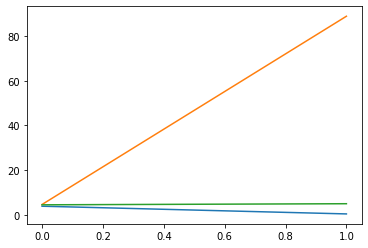

In [53]:
plt.plot(cent)

--------------------------------------------------------------------------------

Профилирование по интересам

In [55]:
interests_df = part0.groupBy("app_id").pivot('mcc').sum('amnt')
interests_df = interests_df.na.fill(0)
interests_df.show(5)

+------+------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+-------------------+------------------+---+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+------------------+---+------------------+------------------+-------------------+---+-------------------+---+------------------+------------------+------------------+---+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+---+------------------+------------------+---+------------------+------------------+------------------+------------------+-------------------+-----------------+---+------------------+------------------+------------------+---+---+-----------------+------------------+---+---+--------

In [64]:
cols = interests_df.columns
cols.remove('app_id')
vec_assemb = VectorAssembler(inputCols=cols, outputCol="interests")
final_data = vec_assemb.transform(interests_df)
final_data.show(10)

+------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+-------------------+-------------------+-------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+---+-------------------+------------------+-------------------+---+-------------------+-------------------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-----------------+-------------------+---------------

Нормализация данных

In [65]:
scaler = StandardScaler(inputCol="interests", outputCol="scaled_interests", withStd=True, withMean=False)
scaled_model = scaler.fit(final_data)
cluster_df = scaled_model.transform(final_data)
cluster_df.show(5)

+------+------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+-------------------+------------------+---+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+------------------+------------------+---+------------------+------------------+-------------------+---+-------------------+---+------------------+------------------+------------------+---+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+---+------------------+------------------+---+------------------+------------------+------------------+------------------+-------------------+-----------------+---+------------------+------------------+------------------+---+---+-----------------+------------------+---+---+--------

In [68]:
kmeans = KMeans(featuresCol="scaled_interests", k=3)
model = kmeans.fit(cluster_df)
model.transform(cluster_df).groupBy("prediction").count().show(5)

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 1971|
|         2|17549|
|         0|69049|
+----------+-----+



In [69]:
centers = model.clusterCenters()
cent = np.array(centers).T
cent

array([[4.76174991e-01, 2.47186890e+00, 1.79445682e+00],
       [6.09855878e-01, 2.52234246e+00, 1.33535174e+00],
       [1.52660867e-01, 2.87223415e+00, 1.24800831e+00],
       [3.04107218e-01, 1.25172280e+00, 1.06144207e+00],
       [1.00859785e-01, 4.04076541e+00, 9.37369756e-01],
       [4.40460354e-02, 2.49172917e+00, 4.95985658e-01],
       [1.98338714e-01, 1.96790239e+00, 9.57368418e-01],
       [1.87729977e-01, 5.93867924e-01, 6.83167081e-01],
       [2.28232051e-01, 1.50074293e+00, 7.62550715e-01],
       [3.05214403e-01, 3.21575990e+00, 1.52687288e+00],
       [1.14150618e-01, 6.11266242e-01, 4.13953559e-01],
       [9.96131214e-02, 9.79967872e-01, 4.52576312e-01],
       [7.94517753e-02, 1.05684416e+00, 6.41452281e-01],
       [1.97609997e-01, 1.25504950e+00, 7.97004477e-01],
       [1.62440669e-01, 1.89384547e+00, 8.53563688e-01],
       [2.00062967e-01, 3.14092469e+00, 1.18076923e+00],
       [1.69045707e-01, 1.95930401e+00, 9.42205725e-01],
       [3.55543232e-02, 2.32516

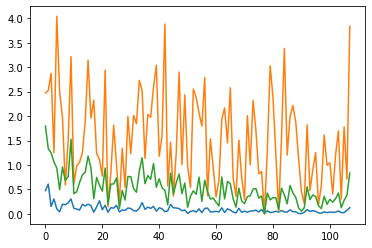

In [70]:
plt.plot(cent)